# Multiple Linear Regression

## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

**So interpretation is important!**

#### The steps we will follow throughout this Assignment:
    
1. Reading , understanding and visualizing the data
2. Preparing the data for modelling (train-test split , rescaling etc.)
3. Training the model
4. Residual Analysis
5. Predictions and evaluation on the test set.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas visualization libraries and read the Bike Sharing dataset

In [87]:
# Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [89]:
# Read the dataset
Bike = pd.read_csv('day.csv')
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the Bike Sharing dataframe

In [90]:
# Shape
Bike.shape

(730, 16)

In [91]:
# Structure of Bike D.F

Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [92]:
# To get stats of Bike D.F

Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [93]:
# Droping the Unnecessary variables

Bike.drop(columns=['instant','dteday','casual','registered','atemp'],inplace=True)

In [94]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [95]:
# Shape after dropping
Bike.shape

(730, 11)

In [96]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [97]:
# Mapping values to the variables :
Bike['season'].replace(to_replace = [1,2,3,4], value =['spring','summer','fall','winter'], inplace=True)
Bike['mnth'].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value =['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], inplace=True) 
Bike['weathersit'].replace(to_replace = [1,2,3], value =['Clear','Cloudy','Rain'], inplace=True)
Bike['weekday'].replace(to_replace = [0,1,2,3,4,5,6] , value =['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], inplace=True)

In [98]:
# Checking Datatype after mapping
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [99]:
# Inspecting D.F
Bike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,JAN,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,JAN,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,JAN,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,JAN,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,JAN,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,0,JAN,0,Thursday,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,0,JAN,0,Friday,1,Cloudy,8.057402,49.8696,11.304642,1510
7,spring,0,JAN,0,Saturday,0,Cloudy,6.765000,53.5833,17.875868,959
8,spring,0,JAN,0,Sunday,0,Clear,5.671653,43.4167,24.250650,822
9,spring,0,JAN,0,Monday,1,Clear,6.184153,48.2917,14.958889,1321


## Step 1.2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

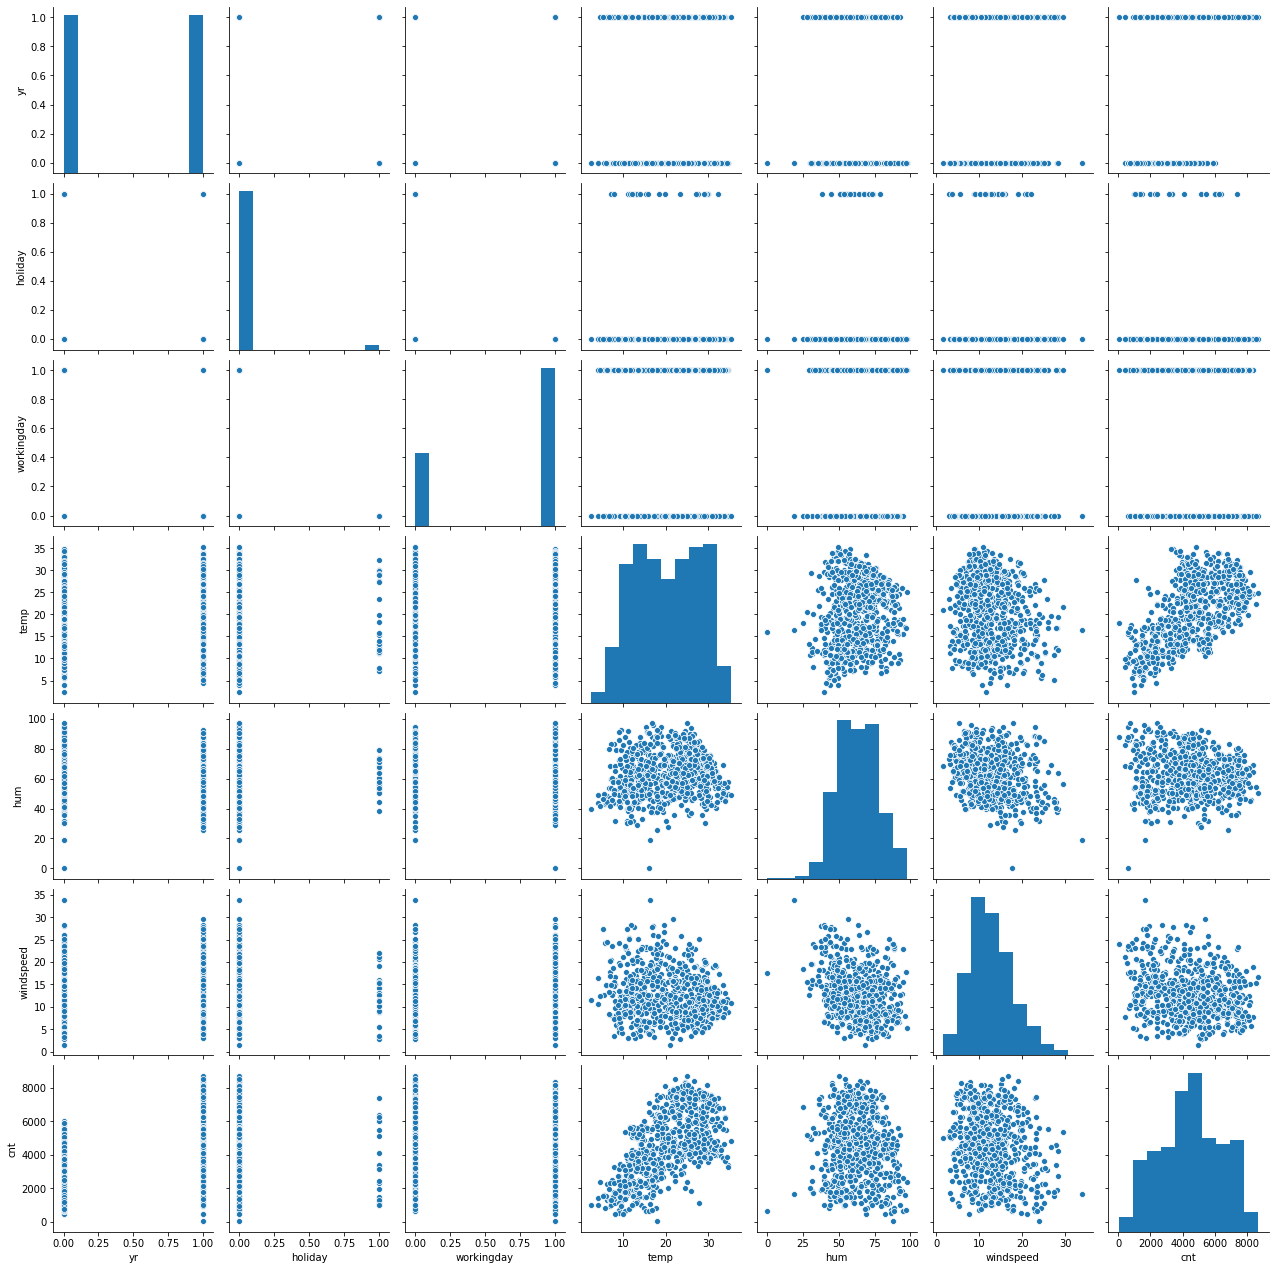

In [100]:
# by visualising we check the collinearity
#### Visualising Numeric Variables

### Let's make a pairplot of all the numeric variables

sns.pairplot(Bike)
plt.show()

##### From analysis we can say we should consider linear regression model because there are atleast few
##### variables that looks co-related with cnt

#### Visualising Categorical Variables

As you might have noticed, there are few categorical variables **('season','weathersit','weekday','mnth')** as well. Let's make a boxplot for that variable.

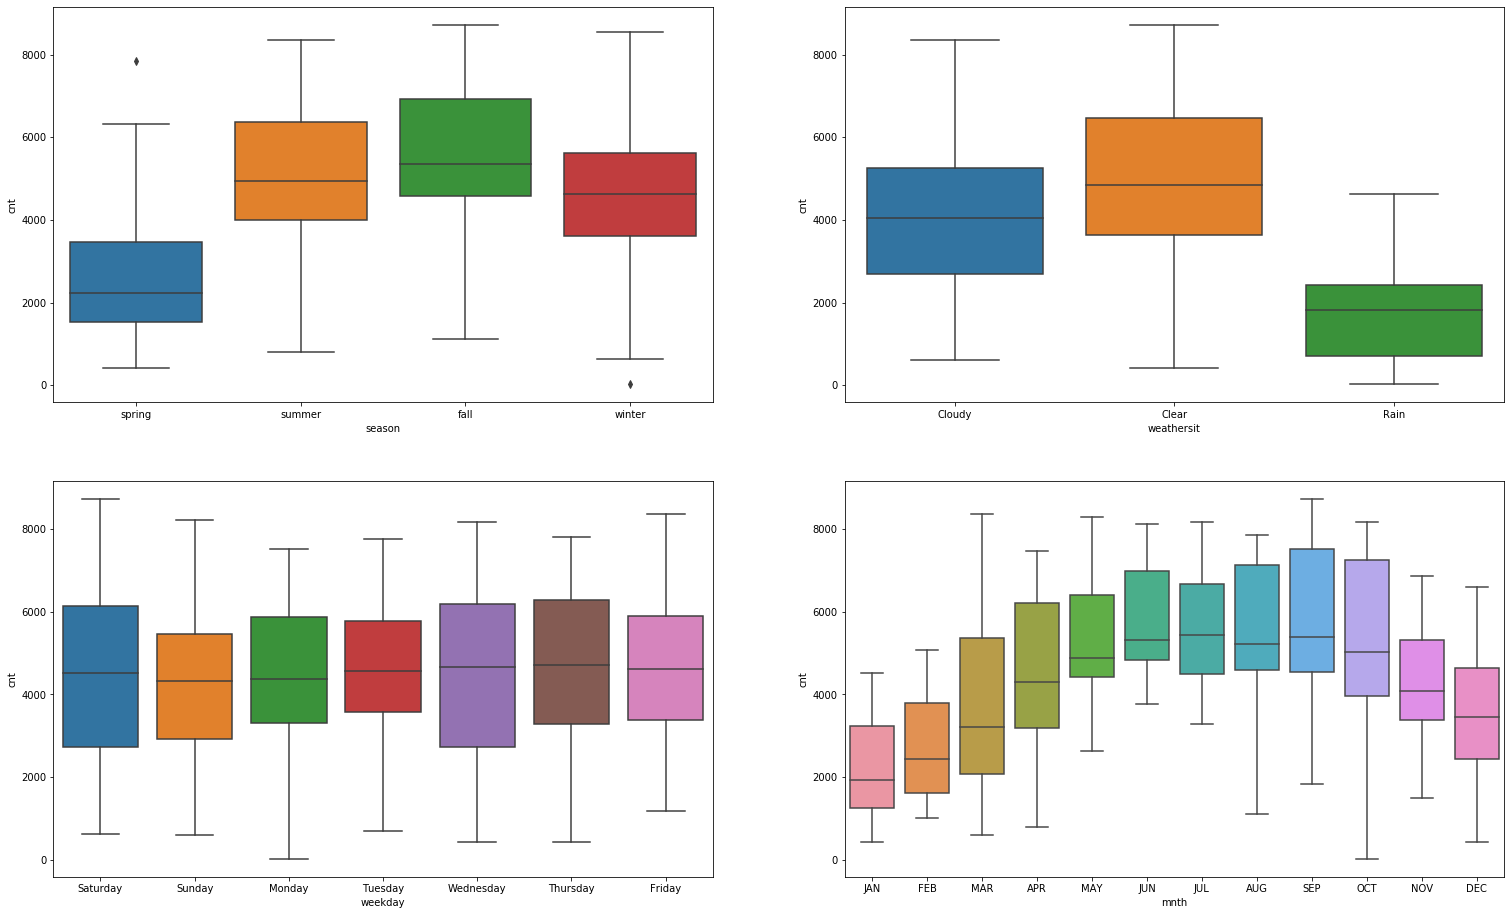

In [101]:
plt.figure(figsize=(26, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.show()


#### From the above plots we can derive that cnt vs season:
    - In 1(spring) season the company has experiance decline in demand 
    - where as in 3(Fall) the company has experienced a exponential increse demand.
    
- cnt vs weathersit: 1(clearsky) the demand is high where as 3(rain/snow) the demand  decline.
- cnt vs weekday   : 4(Thursday) 6(sat) in end of week demand seems high where as in weekdays the demand gradually decreses but it 
                    seems medians are almost same for weekend and weekdays0
- cnt vs mnth      : From the plot we derive that in the month of 1(Jan) demand is low when compare to other months
                    where as 9(Sept) demand is high when compare to other months


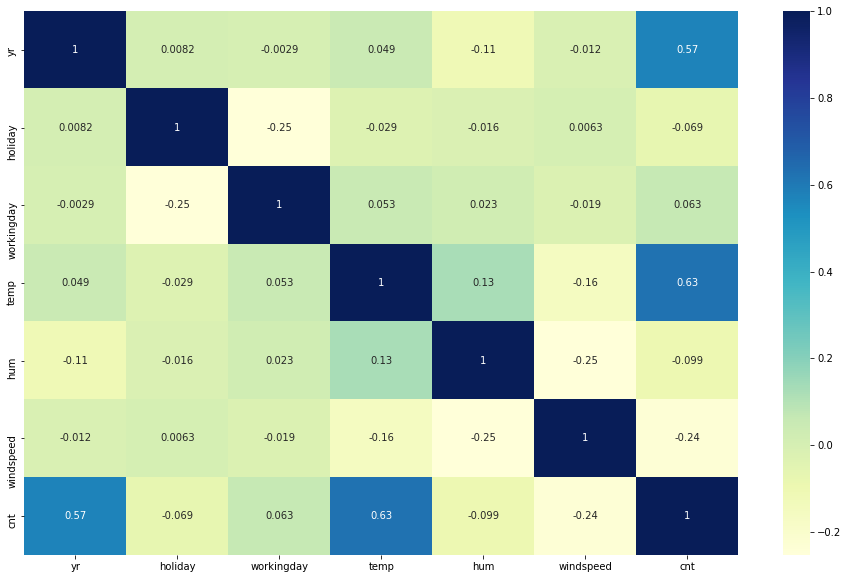

In [102]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(Bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the above heat map cnt vs yr are highly correlated and cnt vs temp are highly correlated

## Step 2: Preparing the Data for Modelling


#### Converting/Making Categorical Variables to Dummy Variables


In [103]:
# To check the categorical variables
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [104]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,JAN,0,Saturday,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,JAN,0,Sunday,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,JAN,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,JAN,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,JAN,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [105]:
# Dummify
seasons = pd.get_dummies(Bike['season'],drop_first = True)
months = pd.get_dummies(Bike['mnth'],drop_first = True)
week = pd.get_dummies(Bike['weekday'],drop_first = True)
weather = pd.get_dummies(Bike['weathersit'],drop_first = True)

In [106]:
# Add the results i.e dummy df to the original house dataframe using concat

Bike = pd.concat([Bike, seasons], axis = 1)
Bike = pd.concat([Bike, months], axis = 1)
Bike = pd.concat([Bike, week], axis = 1)
Bike = pd.concat([Bike, weather], axis = 1)

In [107]:
Bike.shape

(730, 33)

In [108]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  spring      730 non-null    uint8  
 12  summer      730 non-null    uint8  
 13  winter      730 non-null    uint8  
 14  AUG         730 non-null    uint8  
 15  DEC         730 non-null    uint8  
 16  FEB         730 non-null    uint8  
 17  JAN         730 non-null    uint8  
 18  JUL         730 non-null    uint8  
 19  JUN         730 non-null    u

In [109]:
# Drop some variables as we have created the dummies for it

Bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
Bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
Bike.shape

(730, 29)

##### Now steps to be performed:

#### Splitting train-test data
#### Rescaling 

###### Splitting into train and test

In [111]:
# Import sklearn & importing train_test_split

import sklearn
from sklearn.model_selection import train_test_split

In [112]:
my_train, my_test = train_test_split(Bike, train_size=0.7 , random_state=100)
print(my_train.shape)
print(my_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `casual', 'registered' , 'cnt'.all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalization) : between 0 and 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [113]:
Bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [114]:
# Noramlization : (x-xmin)/(xmax-xmin)  = Most preferable
# standardisation : (x-mean)/S.D


# Importing preprocessing librabry from sklearn package and importing MinMaxScaler class
from sklearn.preprocessing import MinMaxScaler

In [115]:
# 1 . Instantiate an object
scaler = MinMaxScaler()


# create a list of numeric variables 
num_var = ['windspeed','hum','temp']


# 2. Fit on data

my_train[num_var] = scaler.fit_transform(my_train[num_var])
my_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,1683,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [116]:
# to veify the min and max values lies btw 0 and 1

my_train[num_var].describe()

,windspeed,hum,temp
count,510.000000,510.000000,510.000000
mean,0.320883,0.650480,0.537440
std,0.169803,0.145846,0.225858
min,0.000000,0.000000,0.000000
25%,0.199179,0.538643,0.339853
50%,0.296763,0.653714,0.542596
75%,0.414447,0.754830,0.735215
max,1.000000,1.000000,1.000000


## Step 3: Training the model

### Dividing into X and Y sets for the model building

In [117]:
# X_train , y_train
# Dividing into X and Y sets for the model building

X_train = my_train
y_train = my_train.pop('cnt')

In [118]:
X_train.shape

(510, 28)

In [119]:
y_train.shape

(510,)

In [120]:
print(X_train)
print(y_train)

     yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
576   1        0           1  0.815169  0.725633   0.264686       0       0   
426   1        0           0  0.442393  0.640189   0.255342       1       0   
728   1        0           0  0.245101  0.498067   0.663106       1       0   
482   1        0           0  0.395666  0.504508   0.188475       0       1   
111   0        0           1  0.345824  0.751824   0.380981       0       1   
..   ..      ...         ...       ...       ...        ...     ...     ...   
578   1        0           1  0.863973  0.679690   0.187140       0       0   
53    0        0           1  0.202618  0.435939   0.111379       1       0   
350   0        0           0  0.248216  0.577930   0.431816       0       0   
79    0        0           1  0.462664  0.759870   0.529881       0       1   
520   1        0           1  0.600225  0.632030   0.359599       0       1   

     winter  AUG  ...  OCT  SEP  Monday  Saturday  

In [121]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   spring      510 non-null    uint8  
 7   summer      510 non-null    uint8  
 8   winter      510 non-null    uint8  
 9   AUG         510 non-null    uint8  
 10  DEC         510 non-null    uint8  
 11  FEB         510 non-null    uint8  
 12  JAN         510 non-null    uint8  
 13  JUL         510 non-null    uint8  
 14  JUN         510 non-null    uint8  
 15  MAR         510 non-null    uint8  
 16  MAY         510 non-null    uint8  
 17  NOV         510 non-null    uint8  
 18  OCT         510 non-null    uint8  
 19  SEP         510 non-null   

In [122]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [123]:
# # Creating object of LinearRegression
lm = LinearRegression()

# Fitting the data in X_train and y_train
lm.fit(X_train, y_train)


rfe = RFE(lm, 15)             # running RFE

rfe = rfe.fit(X_train, y_train)


In [124]:
#rfe = RFE(lm, 10)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('AUG', False, 6),
 ('DEC', False, 3),
 ('FEB', False, 4),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 13),
 ('MAR', False, 14),
 ('MAY', False, 5),
 ('NOV', False, 2),
 ('OCT', False, 12),
 ('SEP', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 10),
 ('Tuesday', False, 9),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Rain', True, 1)]

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'JAN', 'JUL', 'SEP', 'Saturday', 'Cloudy', 'Rain'],
      dtype='object')

In [126]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,AUG,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

### Building model using statsmodel, for the detailed statistics

In [128]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [129]:
# Just checking the DF
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,JAN,JUL,SEP,Saturday,Cloudy,Rain
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


In [130]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [131]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,JAN,JUL,SEP,Saturday,Cloudy,Rain
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,1,0


In [132]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Fitting & Running the linear model

In [133]:
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.22e-191
Time:                        23:02:21   Log-Likelihood:                -4106.1
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2211.4527    314.189      7.039      0.000    1594.141    2828.765
yr          2003.7410     69.586     28.795      0.000    1867.019    2140.463
holiday     -505.6380    233.674     -2.164      0.031    -964.755     -46.521
workingday   376.6676    100.130      3.762      0.000     179.935     573.400
temp        4429.6085    298.555     14.837      0.000    3843.015    5016.202
hum        -1358.5494    324.373     -4.188      0.000   -1995.871    -721.228
windspeed  -1618.9605    221.474     -7.310      0.000   -2054.108   -1183.813
spring      -442.3970    179.551     -2.464      0.014    -795.176     -89.618
summer       441.2212    128.897      3.423      0.001     187.966     694.476
winter       810.9723    150.105      5.403      0.000     516.049    1105.895
JAN         -299.9787    150.791     -1.989      0.047    -596.250      -3.707
JUL         -459.9603    156.948     -2.931      0.004    -768.328    -151.592
SEP          707.4835    143.080      4.945      0.000     426.364     988.603
Saturday     465.4709    126.015      3.694      0.000     217.880     713.062
Cloudy      -489.5196     90.004     -5.439      0.000    -666.357    -312.682
Rain       -2150.9597    226.245     -9.507      0.000   -2595.482   -1706.438
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
# Dropping constant
VIF = X_train_rfe.drop(['const'], axis=1)

In [135]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = VIF
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
13,Cloudy,2.29
0,yr,2.09
12,Saturday,1.98


In [136]:
# hum has to be dropped because of high VIF values

var_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [137]:
var_rfe.head()

,const,yr,holiday,workingday,temp,windspeed,spring,summer,winter,JAN,JUL,SEP,Saturday,Cloudy,Rain
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,1,0
111,1.0,0,0,1,0.345824,0.380981,0,1,0,0,0,0,0,1,0


In [138]:
# Fitting the model1
lm = sm.OLS(y_train, var_rfe).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.60e-188
Time:                        23:02:21   Log-Likelihood:                -4115.0
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1531.5352    273.457      5.601      0.000     994.256    2068.814
yr          2037.9334     70.251     29.009      0.000    1899.906    2175.960
holiday     -484.8749    237.492     -2.042      0.042    -951.492     -18.257
workingday   402.9488    101.589      3.966      0.000     203.350     602.547
temp        4104.4221    293.059     14.005      0.000    3528.629    4680.215
windspeed  -1358.1595    216.062     -6.286      0.000   -1782.671    -933.648
spring      -520.5502    181.538     -2.867      0.004    -877.231    -163.869
summer       386.8528    130.367      2.967      0.003     130.711     642.994
winter       681.1531    149.304      4.562      0.000     387.806     974.500
JAN         -340.6988    152.971     -2.227      0.026    -641.252     -40.146
JUL         -416.0975    159.193     -2.614      0.009    -728.875    -103.320
SEP          655.9879    144.913      4.527      0.000     371.268     940.708
Saturday     506.7844    127.710      3.968      0.000     255.864     757.705
Cloudy      -706.3222     74.848     -9.437      0.000    -853.382    -559.263
Rain       -2527.6314    211.042    -11.977      0.000   -2942.280   -2112.983
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# Checking the VIF values

var_rfe = var_rfe.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = var_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,Saturday,1.97
8,JAN,1.62
9,JUL,1.59


In [140]:
# Dropping workingday bcoz of high VIF , temp cannot be dropped because of collinearity

model2 =var_rfe.drop(['workingday'], axis=1)

# #import statsmodels.api as sm  
model2 = sm.add_constant(model2)
lm = sm.OLS(y_train, model2).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.48e-186
Time:                        23:02:21   Log-Likelihood:                -4123.0
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1864.7291    264.071      7.061      0.000    1345.893    2383.566
yr          2040.1709     71.284     28.620      0.000    1900.114    2180.228
holiday     -811.4028    226.053     -3.589      0.000   -1255.541    -367.264
temp        4114.7334    297.368     13.837      0.000    3530.477    4698.990
windspeed  -1364.9957    219.240     -6.226      0.000   -1795.750    -934.241
spring      -534.5253    184.180     -2.902      0.004    -896.395    -172.656
summer       379.7120    132.277      2.871      0.004     119.820     639.604
winter       656.0218    151.368      4.334      0.000     358.620     953.424
JAN         -335.1339    155.220     -2.159      0.031    -640.104     -30.164
JUL         -441.4865    161.410     -2.735      0.006    -758.617    -124.356
SEP          662.2948    147.040      4.504      0.000     373.396     951.193
Saturday     175.0135     97.929      1.787      0.075     -17.394     367.421
Cloudy      -689.8670     75.835     -9.097      0.000    -838.865    -540.869
Rain       -2484.9364    213.875    -11.619      0.000   -2905.149   -2064.724
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Checking the VIF values again for model2

model2 = model2.drop(['const'], axis=1)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = model2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.24
0,yr,2.07
6,winter,1.80
7,JAN,1.61
8,JUL,1.59
11,Cloudy,1.56
9,SEP,1.34


In [142]:
# Dropping saturday bcoz of high p-value  & Rebuild the model

model3 = model2.drop(['Saturday'], axis=1)


model3 = sm.add_constant(model3)
lm = sm.OLS(y_train, model3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.14e-187
Time:                        23:02:21   Log-Likelihood:                -4124.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1894.1837    264.138      7.171      0.000    1375.220    2413.148
yr          2036.3860     71.410     28.517      0.000    1896.083    2176.689
holiday     -841.0190    225.941     -3.722      0.000   -1284.937    -397.101
temp        4103.6239    297.959     13.772      0.000    3518.210    4689.038
windspeed  -1346.5329    219.480     -6.135      0.000   -1777.755    -915.310
spring      -536.2630    184.584     -2.905      0.004    -898.924    -173.602
summer       377.1062    132.560      2.845      0.005     116.659     637.554
winter       657.5914    151.699      4.335      0.000     359.540     955.643
JAN         -332.5431    155.555     -2.138      0.033    -638.170     -26.916
JUL         -437.6201    161.751     -2.706      0.007    -755.420    -119.820
SEP          664.0616    147.361      4.506      0.000     374.534     953.589
Cloudy      -689.0769     76.001     -9.067      0.000    -838.400    -539.754
Rain       -2480.9146    214.334    -11.575      0.000   -2902.028   -2059.801
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Checking the VIF values again for model3

model3 =model3.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = model3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,JAN,1.61
8,JUL,1.59
10,Cloudy,1.56
9,SEP,1.34


In [144]:
# Dropping windspeed bcoz of high VIF  & Rebuild the model

model4 =model3.drop(['windspeed'], axis=1)

#import statsmodels.api as sm  
model4 = sm.add_constant(model4)
lm = sm.OLS(y_train, model4).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.83e-180
Time:                        23:02:21   Log-Likelihood:                -4143.3
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     498   BIC:                             8361.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1400.8668    260.693      5.374      0.000     888.674    1913.060
yr          2025.3810     73.967     27.382      0.000    1880.055    2170.707
holiday     -868.3223    234.060     -3.710      0.000   -1328.189    -408.455
temp        4271.3876    307.422     13.894      0.000    3667.383    4875.392
spring      -638.2714    190.476     -3.351      0.001   -1012.507    -264.036
summer       299.0948    136.717      2.188      0.029      30.482     567.708
winter       687.4580    157.100      4.376      0.000     378.797     996.118
JAN         -208.8315    159.816     -1.307      0.192    -522.829     105.166
JUL         -445.6602    167.590     -2.659      0.008    -774.931    -116.389
SEP          704.3152    152.534      4.617      0.000     404.625    1004.005
Cloudy      -676.6643     78.719     -8.596      0.000    -831.327    -522.001
Rain       -2608.9206    221.024    -11.804      0.000   -3043.176   -2174.665
==============================================================================
Omnibus:                       68.324   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.088
Skew:                          -0.692   Prob(JB):                     3.16e-37
Kurtosis:                       5.449   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# Checking the VIF values again for model4

model4 =model4.drop(['const'], axis=1)

# from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = model4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
3,spring,1.99
4,summer,1.94
6,JAN,1.60
7,JUL,1.59
5,winter,1.57
9,Cloudy,1.56
8,SEP,1.34
10,Rain,1.07


In [146]:
# Drop 'JAN' bcoz of high p-value & Rebuild the model

model5 =model4.drop(['JAN'], axis=1)

#import statsmodels.api as sm  
model5 = sm.add_constant(model5)
lm = sm.OLS(y_train, model5).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.71e-181
Time:                        23:02:21   Log-Likelihood:                -4144.1
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     499   BIC:                             8357.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1326.5047    254.585      5.210      0.000     826.313    1826.696
yr          2021.7426     73.967     27.333      0.000    1876.417    2167.068
holiday     -871.4501    234.214     -3.721      0.000   -1331.617    -411.284
temp        4371.3235    297.968     14.670      0.000    3785.897    4956.750
spring      -665.7121    189.449     -3.514      0.000   -1037.928    -293.496
summer       318.5666    135.999      2.342      0.020      51.366     585.767
winter       720.3879    155.175      4.642      0.000     415.510    1025.266
JUL         -454.9198    167.559     -2.715      0.007    -784.128    -125.712
SEP          705.6362    152.639      4.623      0.000     405.742    1005.531
Cloudy      -681.9603     78.671     -8.669      0.000    -836.527    -527.394
Rain       -2598.4215    221.035    -11.756      0.000   -3032.695   -2164.148
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# Checking the VIF values again for model5


model5 =model5.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = model5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,summer,1.94
6,JUL,1.58
5,winter,1.57
8,Cloudy,1.55
3,spring,1.40
7,SEP,1.34
9,Rain,1.07
1,holiday,1.04


In [148]:
# Drop 'JUL' bcoz of high VIF in Temp & Rebuild the model
model6 =model5.drop(['JUL'], axis=1)

#import statsmodels.api as sm  
model6 = sm.add_constant(model6)
lm = sm.OLS(y_train, model6).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.33e-180
Time:                        23:02:22   Log-Likelihood:                -4147.9
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1251.0119    254.670      4.912      0.000     750.657    1751.366
yr          2026.6401     74.415     27.234      0.000    1880.436    2172.844
holiday     -861.4560    235.672     -3.655      0.000   -1324.486    -398.426
temp        4255.6488    296.779     14.339      0.000    3672.561    4838.736
spring      -563.0170    186.813     -3.014      0.003    -930.053    -195.981
summer       454.6909    127.222      3.574      0.000     204.735     704.646
winter       831.6895    150.613      5.522      0.000     535.778    1127.601
SEP          829.3493    146.604      5.657      0.000     541.313    1117.385
Cloudy      -669.4816     79.035     -8.471      0.000    -824.763    -514.200
Rain       -2605.8512    222.422    -11.716      0.000   -3042.847   -2168.855
==============================================================================
Omnibus:                       68.729   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.317
Skew:                          -0.703   Prob(JB):                     1.26e-36
Kurtosis:                       5.409   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Checking the VIF values again for model5


model6 =model6.drop(['const'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = model6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.89
0,yr,2.06
4,summer,1.63
7,Cloudy,1.55
5,winter,1.43
3,spring,1.33
6,SEP,1.23
8,Rain,1.07
1,holiday,1.04


## For the Final Model w.r.t Train Data

### R-squared:	0.821 ~= 82.1%
### Adj. R-squared:	0.818 ~= 81.8%

Now as we can see, the VIFs, R2, AdjR2 and p-values both are within an acceptable range. So we go ahead and make our predictions using this model6 

## Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [150]:
# Structure of final data set
model6.shape


(510, 9)

In [151]:
# add constant

model6= sm.add_constant(model6)

In [152]:
# Checking the Data Frame
model6.head()

,const,yr,holiday,temp,spring,summer,winter,SEP,Cloudy,Rain
576,1.0,1,0,0.815169,0,0,0,0,0,0
426,1.0,1,0,0.442393,1,0,0,0,1,0
728,1.0,1,0,0.245101,1,0,0,0,0,0
482,1.0,1,0,0.395666,0,1,0,0,1,0
111,1.0,0,0,0.345824,0,1,0,0,1,0


In [153]:
model6.shape

(510, 10)

In [154]:
# Making predictions using the model we built

y_train_pred = lm.predict(model6)
y_train_pred.head()

576    6746.722984
426    3927.822741
728    3757.699134
482    4746.677589
111    2507.927619
dtype: float64

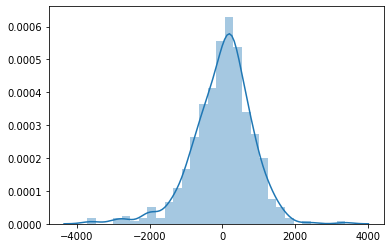

In [155]:
# Residual

res = y_train - y_train_pred
sns.distplot(res)

#### It is normally distributed and centred around 0

## Step 5 : Predictions and evaluation on the test set.

#### Applying the scaling on the test sets

In [156]:
# create a list of numeric variables

num_vars1 = ['windspeed','hum','temp']


# Fit on data
my_test[num_vars1] = scaler.transform(my_test[num_vars1])
my_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [157]:
# To verify
my_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [158]:
X_test = my_test
y_test = my_test.pop('cnt')

In [159]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,AUG,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [160]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [161]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,OCT,SEP,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rain
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [162]:
# Creating X_test_final dataframe by dropping variables from X_test_sm

X_test_final = X_test_sm.drop(["hum","OCT","Monday","Saturday","Sunday","Thursday","Tuesday","Wednesday","FEB","MAR","MAY","JUN","AUG",'DEC','JAN','NOV','windspeed','workingday'], axis = 1)

In [163]:
X_test_final=X_test_final.drop('JUL', axis=1)

In [164]:
# Checking columns of train set

model6.columns

Index(['const', 'yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'SEP',
       'Cloudy', 'Rain'],
      dtype='object')

In [165]:
# Verify

X_test_final.head()

,const,yr,holiday,temp,spring,summer,winter,SEP,Cloudy,Rain
184,1.0,0,1,0.831783,0,0,0,0,1,0
535,1.0,1,0,0.901354,0,1,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,1,0
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0


In [166]:
# Making predictions using the model we built on test data

y_test_pred = lm.predict(X_test_final)

y_test_pred

184    3259.852185
535    7568.189004
299    3591.957416
221    5002.899628
152    5183.613484
          ...     
702    6319.010000
127    4193.765558
640    6612.862609
72     2098.984872
653    6279.239395
Length: 220, dtype: float64

### Model Evaluation

In [167]:
# Import r2_score method from sklearn 

from sklearn.metrics import r2_score

In [168]:
# evaluate R-squared: for test 
r2_score(y_test,y_test_pred)

# FOR TEST DATA ~ 81%

0.8090304806579873

In [169]:
# evaluate R-squared: for train
r2_score(y_train,y_train_pred)

# FOR TRAIN DATA ~ 82%

0.8212172937848272

Text(0, 0.5, 'y_pred')

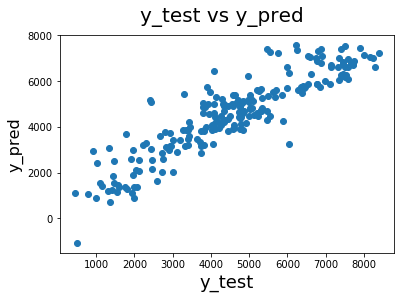

In [170]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

We can see that the equation of our best fitted line is:

$ cnt = 2026  \times  yr - 861 \times  holiday + 4255 \times temp - 563 \times spring + 454 \times summer + 837 \times winter + 829 \times SEP - 669 \times Cloudy - 2605 \times Rain $


In [171]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.33e-180
Time:                        23:02:23   Log-Likelihood:                -4147.9
No. Observations:                 510   AIC:                             8316.
Df Residuals:                     500   BIC:                             8358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1251.0119    254.670      4.912      0.000     750.657    1751.366
yr          2026.6401     74.415     27.234      0.000    1880.436    2172.844
holiday     -861.4560    235.672     -3.655      0.000   -1324.486    -398.426
temp        4255.6488    296.779     14.339      0.000    3672.561    4838.736
spring      -563.0170    186.813     -3.014      0.003    -930.053    -195.981
summer       454.6909    127.222      3.574      0.000     204.735     704.646
winter       831.6895    150.613      5.522      0.000     535.778    1127.601
SEP          829.3493    146.604      5.657      0.000     541.313    1117.385
Cloudy      -669.4816     79.035     -8.471      0.000    -824.763    -514.200
Rain       -2605.8512    222.422    -11.716      0.000   -3042.847   -2168.855
==============================================================================
Omnibus:                       68.729   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.317
Skew:                          -0.703   Prob(JB):                     1.26e-36
Kurtosis:                       5.409   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
lm.params

const      1251.011851
yr         2026.640079
holiday    -861.455972
temp       4255.648768
spring     -563.016972
summer      454.690899
winter      831.689493
SEP         829.349324
Cloudy     -669.481580
Rain      -2605.851198
dtype: float64

### Recommendation

- By using these 9 variables i.e ['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'SEP', 'Cloudy', 'Rain']
  prepared a linear regression model with 80.9% accuracy (TEST) , the model can behave better by using more number of variables but it will make the model more complex So, it is a good model i.e above 80% with less number of varibales i.e 9.

### Conclusion 

- We drived the model(model6) and equation for it in realtion to one dependent/target vaiable i.e (cnt) and 9 independent variables and conclude that with increase in units of {'yr' ,'temp' , season (summer & winter) , 'sept'} the demand in count of total no of rental bikes(cnt) increases.

- Whereas the increases in units of {'holiday','spring','cloudy','rain',} the demand in count   of total no of rental bikes(cnt) may decrease.